<a href="https://colab.research.google.com/github/nabilanewaz/ML/blob/main/Nabila_Newaz_210041216_CSE_4622_Linear_Regression_In_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="red"> ** Optional : Make A COPY **

# <font color = "orange"> Today's Topics:
1. ``` class ``` in Python
2. Data Preprocessing
3. Linear Regression

  i.  Univariate

  ii. Multivariate



# <font color = "orange" > ```class``` in Python
* constructor ```__init__()```
* ```self```

  * every method takes ``` self ```
  * difference beetween ``` age ``` and ``` self.age ```

In [ ]:
class myClass:
  def __init__(self):
     print("This is a constructor")

  def myFunction(self, y):
    print("This is a function")
    self.y = y
    print(y)
    print(self.y)

  def anotherFunction(self, y):
    #print(y)
    print(self.y)

obj = myClass()
obj.myFunction(10)
obj.anotherFunction(10)

This is a constructor
This is a function
10
10
10


#### <font color="lime"> TODO: creating ```class``` in Python

* Create a class for **Person**
* with attributes **name**, **age**
* constructor and method **printinfo()**

** Note:
* every method takes ``` self ```
* difference beetween ``` age ``` and ``` self.age ```

In [ ]:
class Person:
  def __init__(self, name, age):
    self.name = name
    self.age = age

  def printinfo(self):
    print(self.name, self.age)

aboutme = Person("Nabila", 23)
aboutme.printinfo()

age = int(input())
print(age - aboutme.age)


Nabila 23
57
34


# <font color="orange"> Linear Regression from Scratch

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

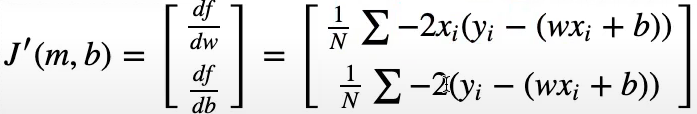

#### <font color="lime"> TODO: create a ```class LinearRegression```

* ```__init__()```:
  * args: takes **learning rate**, **number of iterations** as arguments; you can also assign default values to these arguments
  * declares two variables as **weights** and **bias** respectively with ```None``` value
  * to plot the cost/error later, declare a list.

* ```fit(```):
  * args: ***X***: data (sample x feature) matrix, ***y***: labels or values
  * from data ***X***, determine **no of samples** and **no of features** [hint: shape of X]
  * ininitalize **weights** and **bias**
  * for every iteration till the no of iteration:
    * predict with current **weights** and **bias**
    * [hints: np.dot(), np.sum(), np.mean(), transpose of X = X.T]
    * determine **cost** / **(Mean-Squared) Error** and append to the cost list
    * update the **weights** and **bias**

* ```predict()```:
  * args: ***X***: new data for which we want to predict
  * predict: [hint: same as prediction from ```fit()``` method]
  * returns: predicted value(s)

* ```plot_gradientDescent()```:
  * plots the cost (or, gradient descent) list: [hint:```plt.plot()```]


y = wx + b
*   y = prediction (dim: n*1)
*   x = (input) feature (dim: n*f)
*   w = weight (dim: f*1)
*   b = bias (scalar)
*   w, b -> learning parameters

Pipeline for any Machine Learning Algorithm:
1.   Guess/Predict with current parameters
2.   Find error
3.   Update parameters

In [ ]:
def mse(y_true, y_predicted):
    return np.mean((y_true - y_predicted)**2)

In [ ]:
class LinearRegression:
  ## todo
  def __init__(self, learning_rate = 0.1, no_of_iterations = 50):
    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations
    self.weights = None
    self.bias = None
    self.cost_list = []

  def fit(self, X, y):
    n_samples, f_features = X.shape
    self.weights = np.zeros(f_features)
    self.bias = 0

    for i in range(self.no_of_iterations):
      y_predicted = np.dot(X, self.weights) + self.bias
      cost = mse(y, y_predicted)
      self.cost_list.append(cost)
      dw = (1/n_samples)* np.dot(X.T, (y_predicted - y))
      db = (1/n_samples)* np.sum(y_predicted - y)
      self.weights -= self.learning_rate * dw
      self.bias -= self.learning_rate * db

  def predict(self, X):
    return np.dot(X, self.weights) + self.bias

  def plot_gradientDescent(self):
    plt.plot(self.cost_list)
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.show()

**In the Linear Regression class, we have four methods:**
<ol>
<li> Constructor (learning rate, iterations) </li>
<li> fit (where the machine actually learns, used to actually learn from the data, fit(X_train, y_train)) </li>
<li> predict(After learnign, we want to predict for new data. The data herw will go as test) </li>
<li> plotting (No parameters, internally a cost list exists that will finally plot) </li>
</ol>

**self.weight = 1 why didn't we write it?**

**Ans**: We avoid hardcoding self.weight = 1 because we aim to create a generalized model that can handle any number of features (i.e., multivariate regression).
Instead of assigning a single weight (like 1), we initialize weights dynamically—usually as a vector—based on the number of input features. This makes the model scalable and adaptable to:

Univariate regression (1 feature),

Multivariate regression (multiple features).

This generalization ensures that the model works regardless of whether you have 1 feature or 100.

**The fit function**

X_training data and y_training are our arguments.
X -> for one feature and many samples, the matrix is mx1. (For n features, the matrix is mxn). The shape is requried to find out the number of samples and features. So the shape of the weight will be the number of features.

For every iteration:
1.   predict something
2.   error made -> cost, append to the list
3.   update for next iteration

dw, db

w = w - lrxdw
b = b - lrxdb

X.shape return a touple

X.shape[0], X,shape[1]



# <font color="orange"> Univariate Linear Regression

### Gathering Dataset

In [ ]:
X, y = datasets.make_regression(n_samples = 100, n_features = 1, noise = 20, random_state = 7)  # random_state == seed

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

print("shapes: x:", X.shape, "\t\t y:", y.shape)
print("shapes: X_train:", X_train.shape, "\t y_train:" ,y_train.shape)
print("shapes: X_test:", X_test.shape, "\t y_test:" , y_test.shape)

shapes: x: (100, 1) 		 y: (100,)
shapes: X_train: (80, 1) 	 y_train: (80,)
shapes: X_test: (20, 1) 	 y_test: (20,)


The data will be generated using scikitlearn, randomly,
100 samples, 1 feature -> univariate implementation.
Noise and random state
We will have data x and y, from which we will split to training and test(4 set).

X_train, X_test contains data

Y_train, Y_test contains values

In [ ]:
X[0:5]

array([[ 0.00206557],
       [ 0.6547057 ],
       [-1.4506787 ],
       [ 1.76616088],
       [ 0.27445992]])

In [ ]:
y[0:5]

array([  7.74874748,  48.30195813, -99.86839046, 170.69731585,
        35.38423095])

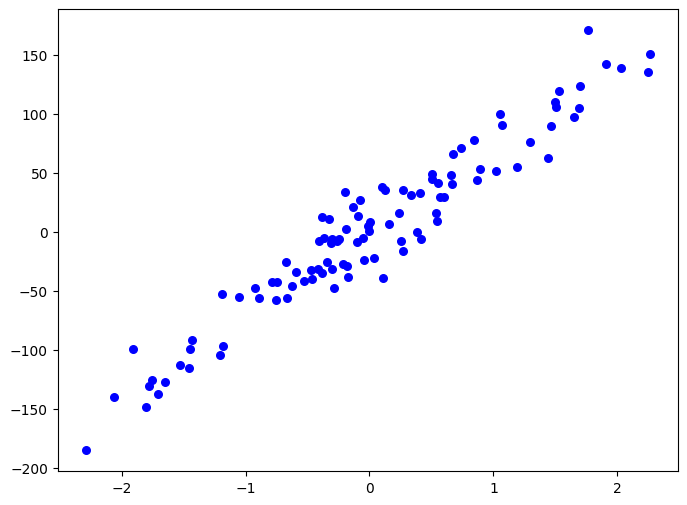

In [ ]:
fig = plt.figure(figsize = (8,6))
plt.scatter(X[:, 0], y, color = 'b', marker = 'o', s = 30)
plt.show()

### Running Regression

In [ ]:
# TODO: 1. create an object for linear regression class
# 2. run the fit() function with x train and y train
# 3. run the predict function with x test

linear = LinearRegression(learning_rate = 0.001, no_of_iterations = 10000)
linear.fit(X_train, y_train)
predicted = linear.predict(X_test)


In [ ]:
# MEAN SQUARED ERROR  for the predicted values
MSE = mse(y_test, predicted)  # y_test are the true values
print(MSE)

387.4268402120403


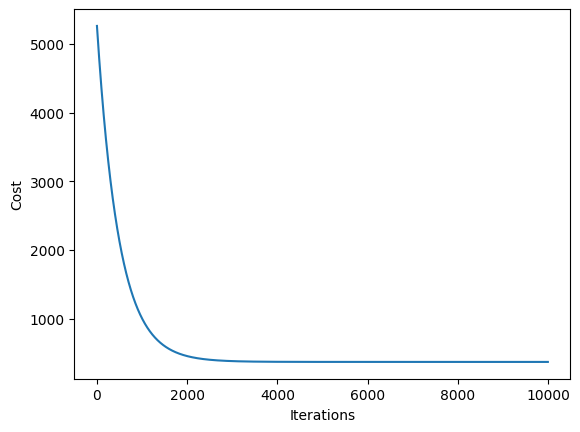

In [ ]:
# TODO: plot the gradient descent
linear.plot_gradientDescent()

jumping kichu ekta. combination, learning rate. why jump. optimized value theke onno direction e jeye abr back korse

### visualization : see how the line fits

In [ ]:
def draw_line (X_train, y_train, X_test, y_test, y_predicted):
    cmap = plt.get_cmap('viridis')
    fig = plt.figure(figsize = (8,6))
    m1 = plt.scatter(X_train, y_train, color = cmap(0.9), s =10)
    m2 = plt.scatter(X_test, y_test, color = cmap(0.5), s =10)
    plt.plot(X_test, y_predicted, color = 'black', linewidth = 2, label = 'prediction')
    plt.show()

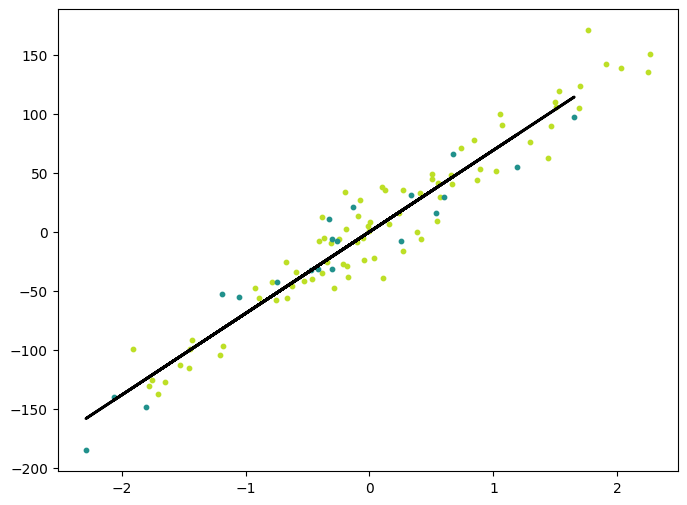

In [ ]:
draw_line(X_train, y_train, X_test, y_test, predicted)

# <font color="orange"> Multivariate Linear Regression

# <font color = "orange"> Car Price Prediction

## Importing Libraries and Downloading Data

In [ ]:
import pandas as pd
import seaborn as sns
!gdown 1m_uJkaKZvX24wdyAjXFIxTUY3SIawaCF

Downloading...
From: https://drive.google.com/uc?id=1m_uJkaKZvX24wdyAjXFIxTUY3SIawaCF
To: /content/CarPrice.csv
100% 26.7k/26.7k [00:00<00:00, 62.2MB/s]


## Reading and Understanding Data

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/sample_data/CarPrice.csv")
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
data.shape

(205, 26)

In [ ]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

## Data Cleaning

### Splitting company name from CarName column
idea: car price depends on the Brand/ Company name

In [ ]:
carnames = data['CarName']
CompanyNames = []

for carname in carnames:
    brand = carname.split(" ")[0]
    CompanyNames.append(brand)

data.drop(['CarName'], axis = 1, inplace = True)
data.insert(3, "CompanyName", CompanyNames)

data.head()

,car_ID,symboling,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,gas,audi,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,gas,audi,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
data.CompanyName = data.CompanyName.str.lower()

In [ ]:
data.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

#### Fixing invalid values
- There seems to be some spelling error in the CompanyName column.

    - `maxda` = `mazda`
    - `porsche` = `porcshce`
    - `toyota` = `toyouta`
    - `vokswagen` = `volkswagen` =  `vw`

In [ ]:
def replace_name(a, b):
    data.CompanyName.replace(a, b, inplace = True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

data.CompanyName.unique()

<ipython-input-22-3610674280>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.CompanyName.replace(a, b, inplace = True)


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

#### Checking for duplicate entries

In [ ]:
data.loc[data.duplicated()]

,car_ID,symboling,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


## Visualizing the data

### Categorical Data

<ipython-input-27-2822120389>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.price)


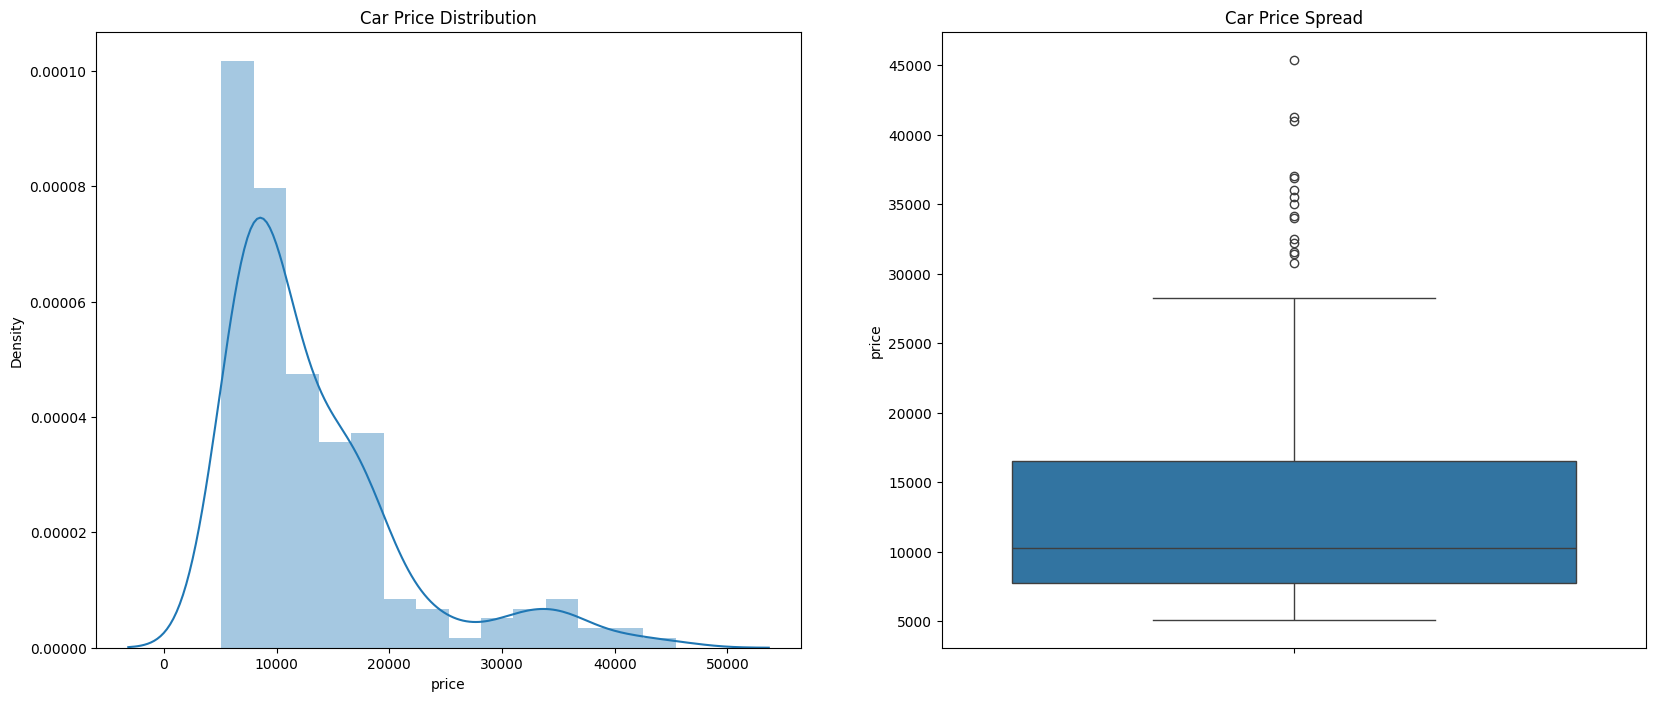

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution')
sns.distplot(data.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=data.price)

plt.show()

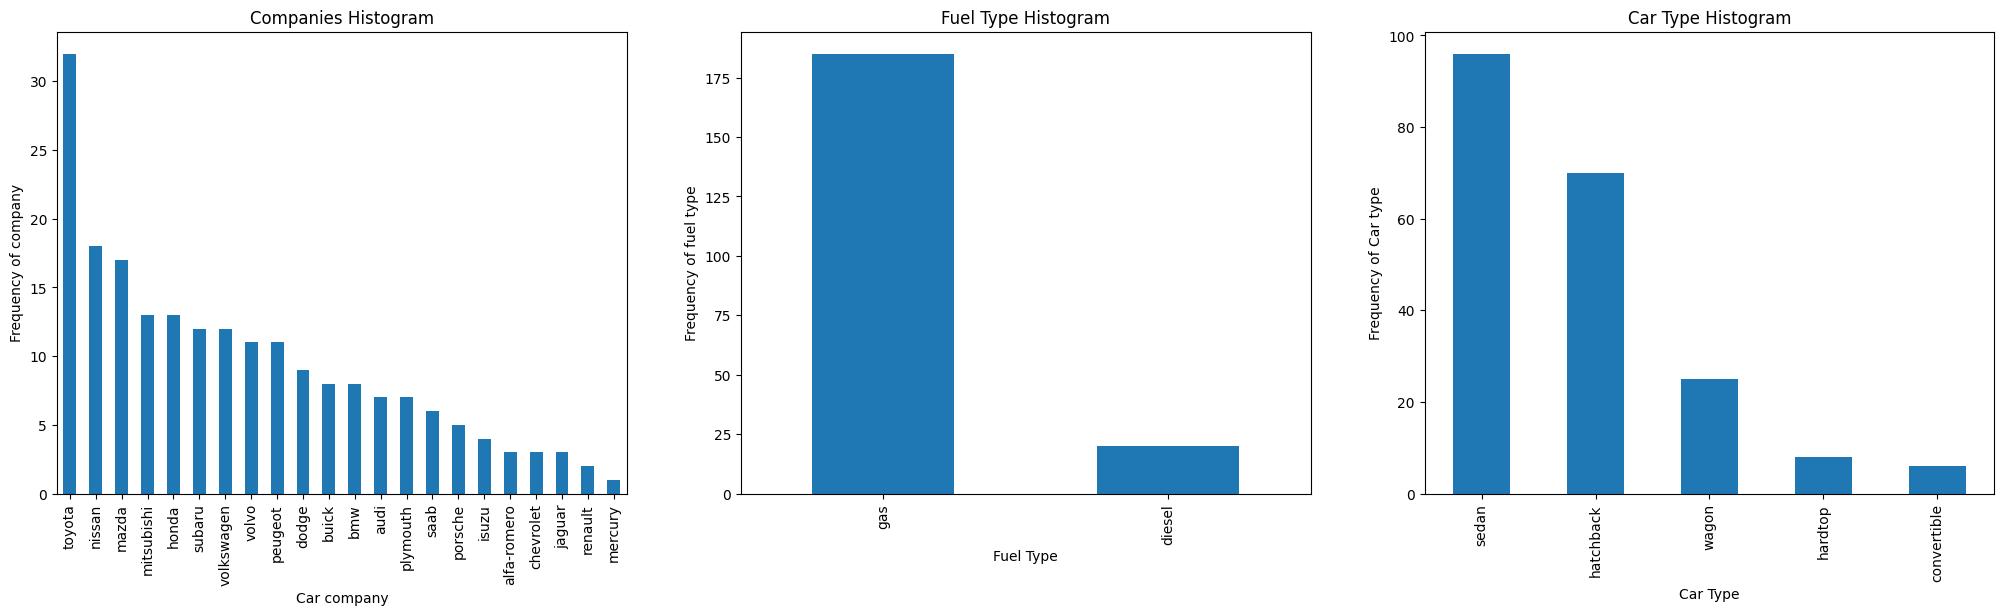

In [ ]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = data.CompanyName.value_counts().plot(kind = 'bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = data.fueltype.value_counts().plot(kind = 'bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = data.carbody.value_counts().plot(kind = 'bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

<ipython-input-59-1668572533>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data.enginetype, palette=("Blues_d"))
<ipython-input-59-1668572533>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data.enginetype, y=data.price, palette=("PuBuGn"))


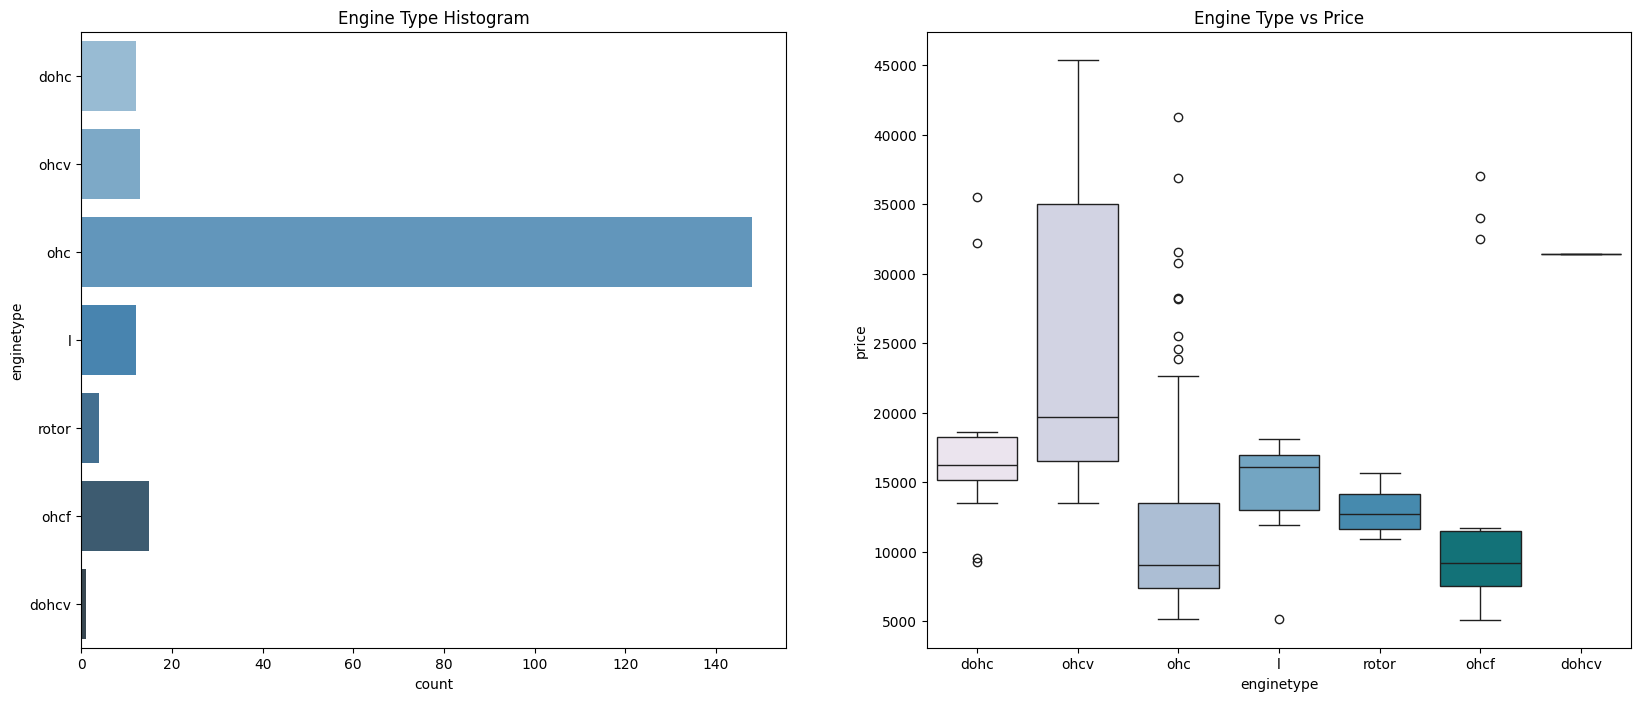

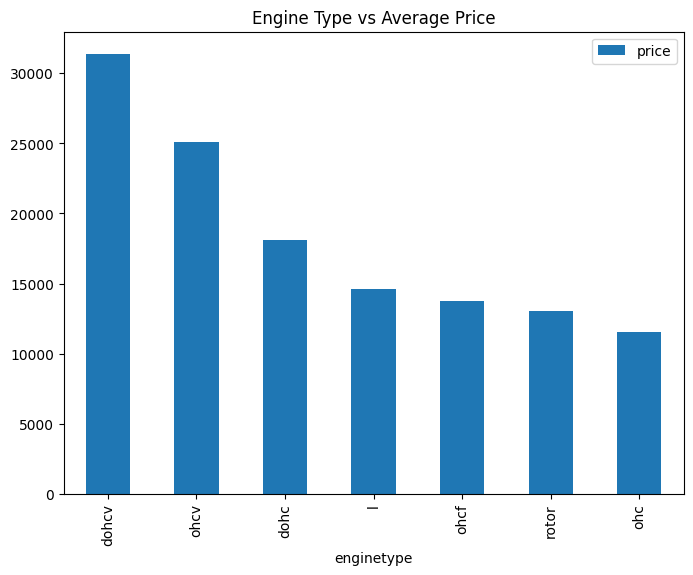

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
sns.countplot(data.enginetype, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=data.enginetype, y=data.price, palette=("PuBuGn"))

plt.show()

df = pd.DataFrame(data.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Engine Type vs Average Price')
plt.show()

<Figure size 2500x600 with 0 Axes>

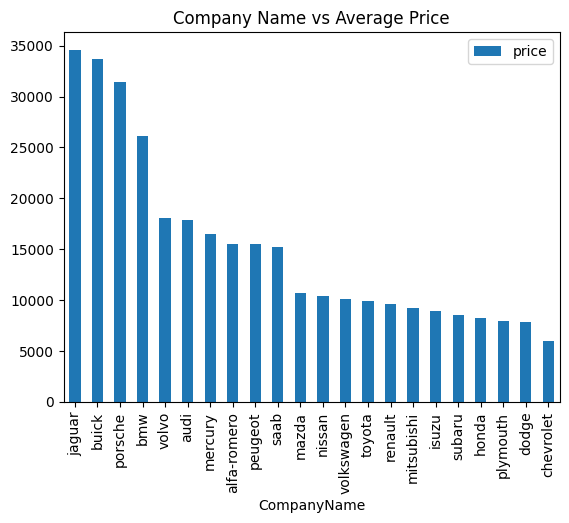

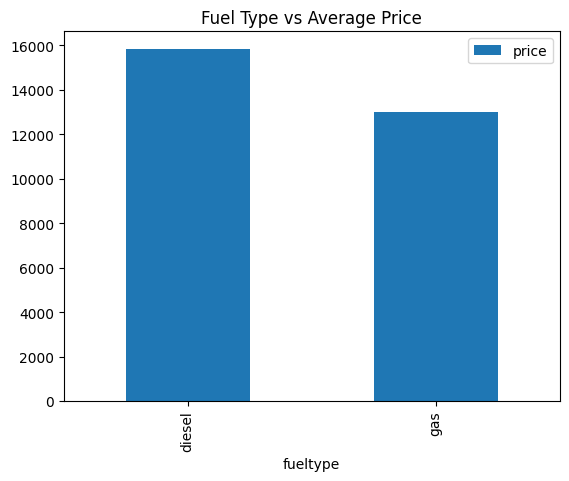

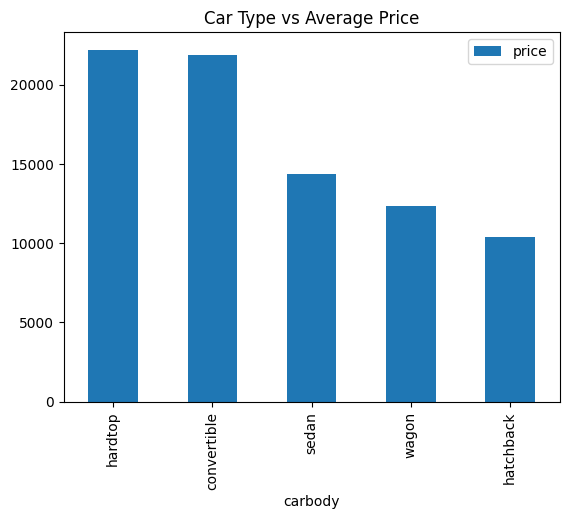

In [ ]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(data.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

df = pd.DataFrame(data.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

df = pd.DataFrame(data.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

<ipython-input-61-2305319359>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data.doornumber, palette=("plasma"))
<ipython-input-61-2305319359>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data.doornumber, y=data.price, palette=("plasma"))


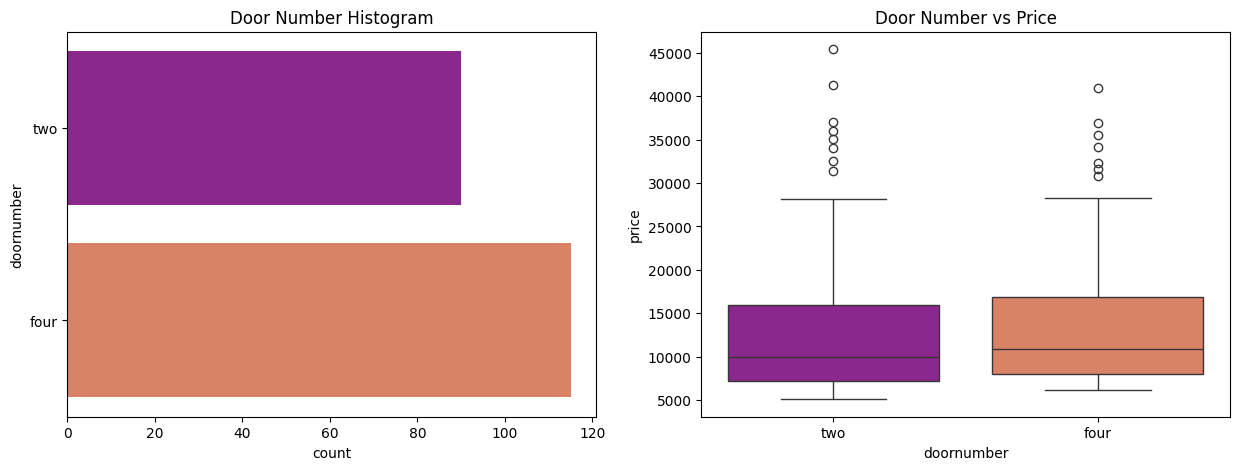

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(data.doornumber, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=data.doornumber, y=data.price, palette=("plasma"))

plt.show()

### Numerical Data

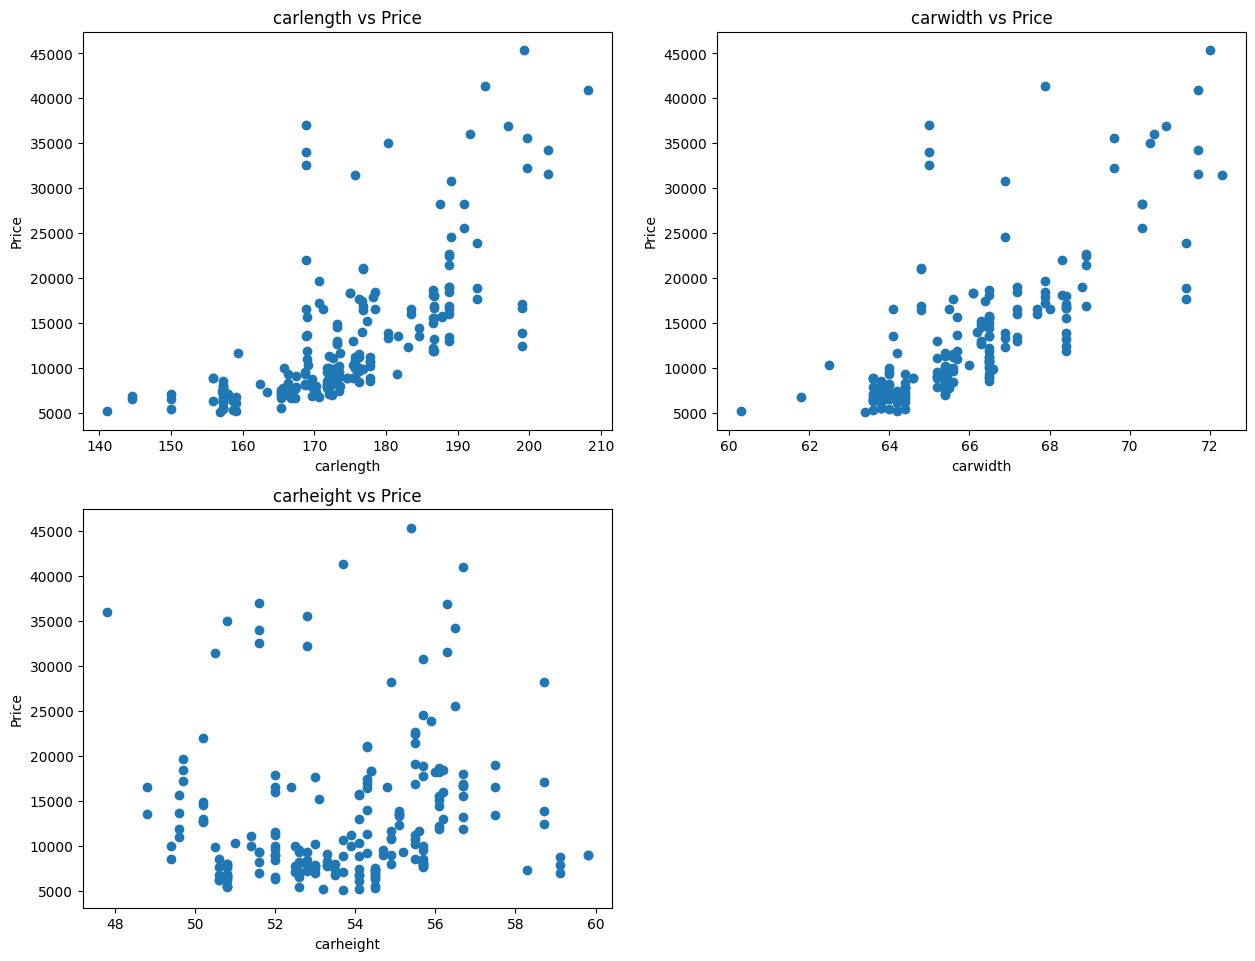

In [ ]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(data[x],data['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(15,30))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)

Car-length and Car-width seems to have positive correlation with price.

In [ ]:
data.head()

,car_ID,symboling,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,gas,audi,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,gas,audi,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Dummy Variables
idea: converting categories to their own features.

i.e. there are 2 fueltypes - diesel and gas.

approach 1: embed diesel to 0 and gas to 1

approach 2: create 2 new vectors called 'diesel' and 'gas' and have 0/1 values for having/not having that fuel

In [ ]:
data.dtypes

,0
car_ID,int64
symboling,int64
fueltype,object
CompanyName,object
aspiration,object
doornumber,object
carbody,object
drivewheel,object
enginelocation,object
wheelbase,float64


In [ ]:
data.fueltype.unique()

array(['gas', 'diesel'], dtype=object)

In [ ]:
data['fueltype'].tail()

,fueltype
200,gas
201,gas
202,gas
203,diesel
204,gas


In [ ]:
# converting categories to their own features. i.e. there are 2 fueltypes - diesel and gas.
# approach 1: embed diesel to 0 and gas to 1
# approach 2: create 2 new vectors called 'diesel' and 'gas' and have 0/1 values for having/not having that fuel

temp = pd.get_dummies(data['fueltype'])
temp.head()

,diesel,gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


In [ ]:
def gen_dummies(column_name, df):
    temp = pd.get_dummies(df[column_name])
    df = pd.concat([df, temp], axis = 1)
    df.drop([column_name], axis = 1, inplace = True)
    return df

data = gen_dummies('fueltype', data)
data.head()

,car_ID,symboling,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,diesel,gas
0,1,3,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,False,True
1,2,3,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,False,True
2,3,1,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500.0,False,True
3,4,2,audi,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950.0,False,True
4,5,2,audi,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450.0,False,True


In [ ]:
data.columns

Index(['car_ID', 'symboling', 'CompanyName', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'diesel',
       'gas'],
      dtype='object')

In [ ]:
data.diesel

,diesel
0,False
1,False
2,False
3,False
4,False
...,...
200,False
201,False
202,False
203,True


In [ ]:
data.gas

,gas
0,True
1,True
2,True
3,True
4,True
...,...
200,True
201,True
202,True
203,False


## Train-Test Split

In [ ]:
data_train, data_test = train_test_split(data, train_size =0.8, test_size = 0.2, random_state = 7)

In [ ]:
data_train.head()

,car_ID,symboling,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,diesel,gas
109,110,0,peugeot,std,four,wagon,rwd,front,114.2,198.9,...,3.46,3.19,8.4,97,5000,19,24,12440.0,False,True
60,61,0,mazda,std,four,sedan,fwd,front,98.8,177.8,...,3.39,3.39,8.6,84,4800,26,32,8495.0,False,True
126,127,3,porsche,std,two,hardtop,rwd,rear,89.5,168.9,...,3.74,2.90,9.5,207,5900,17,25,32528.0,False,True
27,28,1,dodge,turbo,two,sedan,fwd,front,93.7,157.3,...,3.03,3.39,7.6,102,5500,24,30,8558.0,False,True
40,41,0,honda,std,four,sedan,fwd,front,96.5,175.4,...,3.15,3.58,9.0,86,5800,27,33,10295.0,False,True


In [ ]:
## selecting only few features to learn from
faeture_columns = ['wheelbase', 'carlength', 'horsepower', 'diesel', 'gas']
X_train = data_train[faeture_columns].values
X_test = data_test[faeture_columns].values
y_train = data_train['price'].values
y_test = data_test['price'].values
data_train.shape

(164, 27)

In [ ]:
X_train

array([[114.2, 198.9, 97, False, True],
       [98.8, 177.8, 84, False, True],
       [89.5, 168.9, 207, False, True],
       [93.7, 157.3, 102, False, True],
       [96.5, 175.4, 86, False, True],
       [94.5, 155.9, 70, False, True],
       [94.5, 168.7, 70, False, True],
       [86.6, 144.6, 76, False, True],
       [95.7, 166.3, 56, True, False],
       [93.7, 150.0, 60, False, True],
       [101.2, 176.8, 121, False, True],
       [93.7, 157.3, 68, False, True],
       [96.3, 173.0, 116, False, True],
       [99.1, 186.6, 110, False, True],
       [103.3, 174.6, 88, False, True],
       [88.4, 141.1, 48, False, True],
       [114.2, 198.9, 95, False, True],
       [93.7, 167.3, 68, False, True],
       [97.2, 173.4, 97, False, True],
       [107.9, 186.7, 97, False, True],
       [95.3, 169.0, 135, False, True],
       [107.9, 186.7, 95, True, False],
       [94.5, 165.3, 69, False, True],
       [96.5, 157.1, 76, False, True],
       [96.3, 172.4, 88, False, True],
       [104.5

## Training and Evaluation

In [ ]:
# Convert X_train and y_train to float64 NumPy arrays
X_train = X_train.astype(np.float64)
y_train = y_train.astype(np.float64)

In [ ]:
# TODO: 1. create an objest for linear regression class
# 2. run the fit() function with x train and y train
# 3. run the predict function with x test

linearregressor = LinearRegression(learning_rate = 0.0001, no_of_iterations = 100)
linearregressor.fit(X_train, y_train)
predicted = linearregressor.predict(X_test)

In [ ]:
mse(predicted, y_test)

np.float64(1.3097347609699995e+133)

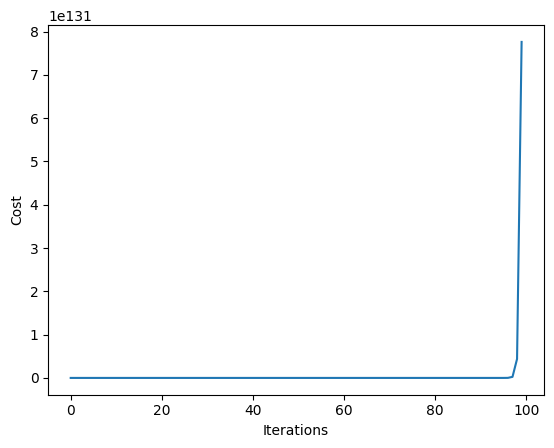

In [ ]:
# TODO: plot the gradient descent
linearregressor.plot_gradientDescent()